<a href="https://colab.research.google.com/github/txmmaqo/100DayswBytewise/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
bosH_ds = pd.read_csv("/content/BostonHousing.csv")

In [ ]:
bosH_ds.head(10)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [ ]:
bosH_ds.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
bosH_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       501 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [ ]:
bosH_ds[bosH_ds.isnull()==True]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
502,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
503,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
504,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
bosH_ds['b'].head(10)

0    396.90
1    396.90
2    392.83
3    394.63
4    396.90
5    394.12
6    395.60
7    396.90
8    386.63
9    386.71
Name: b, dtype: float64

In [ ]:
bosH_ds['b'].tail(10)

496    396.90
497    396.90
498    396.90
499    395.77
500    396.90
501    391.99
502    396.90
503    396.90
504    393.45
505    396.90
Name: b, dtype: float64

In [ ]:
bosH_ds['b'].isna().sum()

0

In [ ]:
corr=bosH_ds.corr()
corr.tail(1)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
medv,-0.388305,0.360445,-0.483725,0.17526,-0.427321,0.696169,-0.376955,0.249929,-0.381626,-0.468536,-0.507787,0.333461,-0.737663,1.0


In [ ]:
from sklearn import preprocessing
scale = preprocessing.StandardScaler()

In [ ]:
bosH_ds = scale.fit_transform(bosH_ds)

In [ ]:
columns = ['CRIM','ZIN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']

In [ ]:
DS = pd.DataFrame(bosH_ds,columns=columns)

In [ ]:
DS

,CRIM,ZIN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.412351,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,0.159686
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.193874,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,-0.101524
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.277743,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,1.324247
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.012451,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,1.182758
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.223834,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,1.487503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,-0.487722,0.115738,-0.272599,0.158124,0.437887,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147,-0.014454
502,-0.415249,-0.487722,0.115738,-0.272599,0.158124,-0.233147,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850,-0.210362
503,-0.413447,-0.487722,0.115738,-0.272599,0.158124,0.981240,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048,0.148802
504,-0.407764,-0.487722,0.115738,-0.272599,0.158124,0.723041,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302,-0.057989


In [ ]:
df['B'].describe()

count    5.060000e+02
mean    -7.442444e-16
std      1.000990e+00
min     -3.907193e+00
25%      2.050715e-01
50%      3.811865e-01
75%      4.336510e-01
max      4.410519e-01
Name: B, dtype: float64

In [ ]:
upper_limit = df['B'].mean()+3*df['B'].std()
lower_limit = df['B'].mean()-3*df['B'].std()

print("upper limit: ", upper_limit)
print("lower limit: ", lower_limit)

upper limit:  3.0029688280397138
lower limit:  -3.0029688280397155


In [ ]:
# Find the outliers

df.loc[(df['B'] > upper_limit) | (df['B'] < lower_limit)]

,CRIM,ZIN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
102,-0.393896,-0.487722,-0.375976,-0.272599,-0.299707,0.171176,0.598310,-0.513562,-0.523001,-0.143951,1.130230,-3.134425,-0.283580,-0.428037
410,5.530321,-0.487722,1.015999,-0.272599,0.365444,-0.748127,1.117494,-1.132350,1.661245,1.530926,0.806576,-3.882195,-0.356471,-0.819852
411,1.214608,-0.487722,1.015999,-0.272599,0.365444,0.528682,1.117494,-1.077920,1.661245,1.530926,0.806576,-3.526401,1.200860,-0.580409
412,1.768579,-0.487722,1.015999,-0.272599,0.365444,-2.349813,1.117494,-1.065370,1.661245,1.530926,0.806576,-3.595038,3.044145,-0.504223
415,1.684046,-0.487722,1.015999,-0.272599,1.073787,0.212317,1.117494,-0.931886,1.661245,1.530926,0.806576,-3.611923,2.298421,-1.668784
416,0.840293,-0.487722,1.015999,-0.272599,1.073787,0.706017,0.790337,-0.939112,1.661245,1.530926,0.806576,-3.674201,1.841454,-1.636133
418,8.136884,-0.487722,1.015999,-0.272599,1.073787,-0.464391,1.117494,-0.947146,1.661245,1.530926,0.806576,-3.730338,1.116756,-1.494644
419,0.954118,-0.487722,1.015999,-0.272599,1.410682,0.765601,0.281821,-0.951234,1.661245,1.530926,0.806576,-3.379479,1.413924,-1.538179
423,0.399963,-0.487722,1.015999,-0.272599,0.512296,-0.257265,0.587642,-0.842945,1.661245,1.530926,0.806576,-3.883072,1.491020,-0.993992
424,0.602650,-0.487722,1.015999,-0.272599,0.253146,-1.020513,0.072014,-0.823122,1.661245,1.530926,0.806576,-3.870682,0.631754,-1.179015


In [ ]:
#Trimming -delete the outlier data

new_df = df.loc[(df['B'] < upper_limit) & (df['B'] > lower_limit)]
print('before removing outliers: ', len(df))
print('after removing outliers: ', len(new_df))
print('outliers: ', len(df)-len(new_df))

before removing outliers:  506
after removing outliers:  481
outliers:  25


In [ ]:
q1 = df['B'].quantile(0.25)

q3 = df['B'].quantile(0.75)

iqr = q3-q1

In [ ]:
q1, q3, iqr

(0.20507152984847357, 0.4336509907154298, 0.2285794608669562)

In [ ]:
upper_limit = q3 + (1.5*iqr)
lower_limit = q1 - (1.5*iqr)

lower_limit, upper_limit

(-0.13779766145196073, 0.776520182015864)

In [ ]:
#Find outliers
df.loc[(df['B'] > upper_limit) | (df['B'] < lower_limit)]

,CRIM,ZIN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
18,-0.327103,-0.487722,-0.437258,-0.272599,-0.144217,-1.175149,-1.137046,0.000693,-0.637962,-0.601276,1.176466,-0.742112,-0.134996,-0.253897
25,-0.322701,-0.487722,-0.437258,-0.272599,-0.144217,-0.972278,0.608978,0.313533,-0.637962,-0.601276,1.176466,-0.583896,0.540641,-0.939573
27,-0.309291,-0.487722,-0.437258,-0.272599,-0.144217,-0.336711,0.719216,0.312963,-0.637962,-0.601276,1.176466,-0.551442,0.648575,-0.841619
32,-0.258993,-0.487722,-0.437258,-0.272599,-0.144217,-0.474322,0.477404,0.092677,-0.637962,-0.601276,1.176466,-1.360392,2.110588,-1.015759
34,-0.232828,-0.487722,-0.437258,-0.272599,-0.144217,-0.267195,1.007257,-0.016753,-0.637962,-0.601276,1.176466,-1.188142,1.077507,-0.983108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,0.018789,-0.487722,1.015999,-0.272599,0.866467,-0.471485,0.573418,-0.439024,1.661245,1.530926,0.806576,-3.669376,0.630353,-0.384502
467,0.094118,-0.487722,1.015999,-0.272599,0.253146,-0.399132,0.921911,-0.596466,1.661245,1.530926,0.806576,-0.278320,1.214877,-0.373618
475,0.323471,-0.487722,1.015999,-0.272599,0.253146,-0.173563,1.025037,-0.755382,1.661245,1.530926,0.806576,-0.591133,1.604560,-1.004875
489,-0.399178,-0.487722,2.422565,-0.272599,0.469104,-1.234733,1.057042,-0.969583,-0.637962,1.798194,0.760340,-0.138414,1.586338,-1.690551


In [ ]:
#Trimming -delete the outlier data

new_df = df.loc[(df['B'] < upper_limit) & (df['B'] > lower_limit)]
print('before removing outliers: ', len(df))
print('after removing outliers: ', len(new_df))
print('outliers: ', len(df)-len(new_df))

before removing outliers:  506
after removing outliers:  429
outliers:  77


<Axes: xlabel='B'>

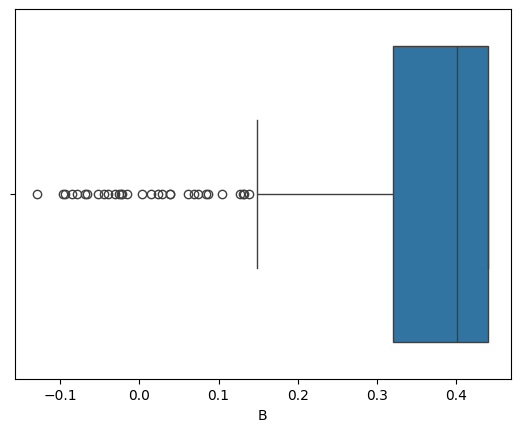

In [ ]:
sns.boxplot(x=new_df['B'])

In [ ]:
# Capping - change the outlier values to upper (or) lower limit values

new_df = df.copy()
new_df.loc[(new_df['B']>upper_limit),'B'] = upper_limit
new_df.loc[(new_df['B']<lower_limit),'B'] = lower_limit

<Axes: xlabel='B'>

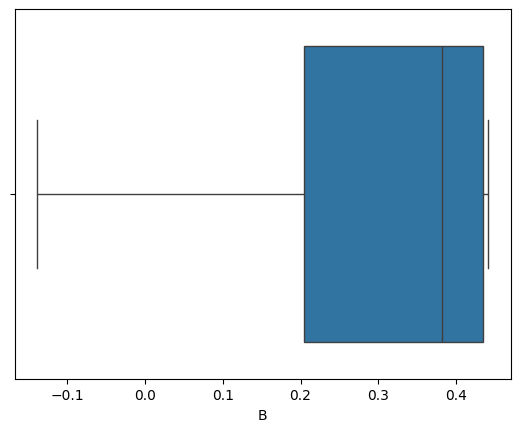

In [ ]:
sns.boxplot(x=new_df['B'])

In [ ]:
new_df

,CRIM,ZIN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.412351,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,0.159686
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.193874,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,-0.101524
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.277743,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,1.324247
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.012451,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,1.182758
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.223834,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,1.487503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,-0.487722,0.115738,-0.272599,0.158124,0.437887,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147,-0.014454
502,-0.415249,-0.487722,0.115738,-0.272599,0.158124,-0.233147,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850,-0.210362
503,-0.413447,-0.487722,0.115738,-0.272599,0.158124,0.981240,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048,0.148802
504,-0.407764,-0.487722,0.115738,-0.272599,0.158124,0.723041,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302,-0.057989


In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZIN      506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [ ]:
new_df.isnull().sum()

CRIM       0
ZIN        0
INDUS      0
CHAS       0
NOX        0
RM         5
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [121]:
new_df.dropna(inplace=True)

In [122]:
new_df.describe()

,CRIM,ZIN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,501.000000,501.000000,501.000000,501.000000,501.000000,5.010000e+02,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000
mean,0.003944,0.001655,0.003478,0.002721,0.003939,-1.843724e-16,-0.002188,-0.004098,0.005449,0.005384,-0.000943,0.275438,-0.001305,0.003099
std,1.005196,1.004928,1.000518,1.005609,1.003656,1.001000e+00,1.003243,0.999857,1.004237,1.003865,1.001628,0.209513,1.004029,1.004835
min,-0.419782,-0.487722,-1.557842,-0.272599,-1.465882,-3.863541e+00,-2.335437,-1.267069,-0.982843,-1.313990,-2.707379,-0.137798,-1.531127,-1.908226
25%,-0.410976,-0.487722,-0.867691,-0.272599,-0.913029,-5.679549e-01,-0.838337,-0.811380,-0.637962,-0.767576,-0.488039,0.203235,-0.803625,-0.602177
50%,-0.390064,-0.487722,-0.211099,-0.272599,-0.144217,-1.083036e-01,0.324494,-0.291089,-0.523001,-0.464673,0.251741,0.380090,-0.178450,-0.145059
75%,0.009262,0.048772,1.015999,-0.272599,0.598679,4.832845e-01,0.904131,0.628893,1.661245,1.530926,0.806576,0.433706,0.600916,0.268523
max,9.933931,3.804234,2.422565,3.668398,2.732346,3.540533e+00,1.117494,3.960518,1.661245,1.798194,1.638828,0.441052,3.548771,2.989460


In [123]:
#identifying the target variables and seperating features and variables
u = new_df.drop("B", axis=1)
v = new_df['B']

In [124]:
u.shape

(501, 13)

In [125]:
v.shape

(501,)

In [126]:
from sklearn.model_selection import train_test_split

In [127]:
u_train, u_test, v_train, v_test = train_test_split(u, v, test_size=0.3, random_state=21)

In [128]:
print("Shape of the train dataset features:")
print(u_train.shape)
print("Shape of the test dataset features:")
print(u_test.shape)

Shape of the train dataset features:
(350, 13)
Shape of the test dataset features:
(151, 13)


In [129]:
print("Shape of the train dataset features:")
print(v_train.shape)
print("Shape of the test dataset features:")
print(v_test.shape)

Shape of the train dataset features:
(350,)
Shape of the test dataset features:
(151,)


In [130]:
#LINEARREGRESSION
from sklearn.linear_model import LinearRegression

In [131]:
#instatiating the estimator object
model_linreg = LinearRegression()

In [132]:
model_linreg.fit(u_train,v_train) #supervised Machine Learning approach

LinearRegression()

In [134]:
print("Intercept of LRM:",
     model_linreg.intercept_)

Intercept of LRM: 0.2734269545579577


In [136]:
v_test_pred = model_linreg.predict(u_test) #pass only the test set features

In [138]:
print(v_test_pred)

[0.27265689 0.34635498 0.11763652 0.42161645 0.39367836 0.36870598
 0.35553961 0.16511217 0.25908282 0.3256387  0.32177844 0.28391034
 0.16892468 0.20505494 0.28079043 0.11331156 0.40318563 0.24391696
 0.36341759 0.35963431 0.37103334 0.26377683 0.26089555 0.30731241
 0.29996922 0.40502917 0.36161314 0.15606392 0.42837339 0.39401349
 0.32146464 0.38166587 0.30890853 0.19173823 0.09140762 0.27918497
 0.11449785 0.12406015 0.34369908 0.13649283 0.32367436 0.12458009
 0.31841611 0.10868447 0.34865215 0.21919337 0.36203007 0.4159317
 0.361625   0.12379203 0.34601652 0.30573138 0.38743817 0.34223234
 0.36885025 0.3351425  0.32734414 0.22479565 0.31781451 0.12930757
 0.37279074 0.24123051 0.33451979 0.42002482 0.33375966 0.36996157
 0.35202041 0.15665795 0.22867372 0.07694036 0.34223895 0.32860726
 0.17198188 0.33793893 0.17068805 0.36143301 0.31081481 0.14665573
 0.1181944  0.34486756 0.10260576 0.35617644 0.3810565  0.25460517
 0.35520238 0.31261162 0.11442539 0.36077767 0.13990233 0.16870

In [139]:
actual_vs_pred_df = pd.DataFrame({'Actual': v_test, 'Predicted' : v_test_pred})

In [140]:
actual_vs_pred_df.head(10)

,Actual,Predicted
162,0.361122,0.272657
175,0.375924,0.346355
449,-0.137798,0.117637
349,0.363753,0.421616
305,0.402238,0.393678
502,0.441052,0.368706
69,0.441052,0.355540
464,0.441052,0.165112
131,0.441052,0.259083
73,0.224725,0.325639


In [141]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [143]:
print("RMSE value of MLR model(Test): ")
print(np.sqrt(mean_squared_error(v_test, v_test_pred)))

RMSE value of MLR model(Test): 
0.18288535548149104


In [144]:
v_train_pred = model_linreg.predict(u_train)

In [145]:
print("RMSE value of MLR model(Train): ")
print(np.sqrt(mean_squared_error(v_train, v_train_pred)))

RMSE value of MLR model(Train): 
0.1830326886418428


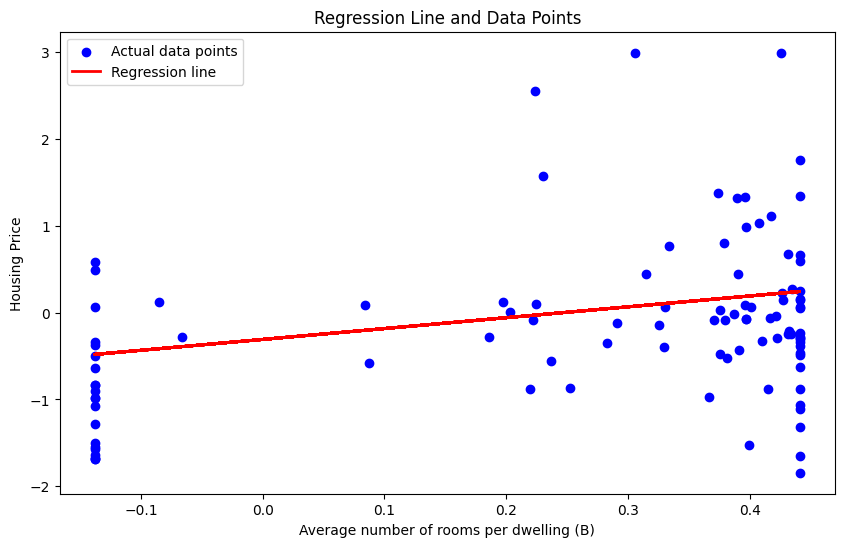

In [153]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Extract the RM feature and the target variable
u =new_df['B']
v = new_df['MEDV']

# Split the data into training and testing sets
u_train, u_test, v_train, v_test = train_test_split(u, v, test_size=0.2, random_state=42)

# Reshape u_train to be a 2D array
u_train_rm = u_train.values.reshape(-1, 1)  # -1 means infer the number of rows
u_test_rm = u_test.values.reshape(-1, 1)

# Train the linear regression model using the RM feature
model_rm = LinearRegression()
model_rm.fit(u_train_rm, v_train)  # Use v_train here, not v_train_rm

# Predict on the test set
v_pred_rm = model_rm.predict(u_test_rm)

# Plot the data points and the regression line
plt.figure(figsize=(10, 6))
plt.scatter(u_test_rm, v_test, color='blue', label='Actual data points') # Use v_test here, not v_test_rm
plt.plot(u_test_rm, v_pred_rm, color='red', linewidth=2, label='Regression line')

plt.title('Regression Line and Data Points')
plt.xlabel('Average number of rooms per dwelling (B)')
plt.ylabel('Housing Price')
plt.legend()
plt.show()